<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr1/blob/Gavrilkov-Nikolay-folder/Gavrilkov%20Nikolay/internship_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1-я стажировка "Профпатолог" - 3 неделя


In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop
# Дополнительные инструменты
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

import random 
import math 
import os 
import re 
%matplotlib inline

In [ ]:
# Для вывода подробной инф по колонке
def info_col (row,x=False):
    print(f'Заполнено: {df_cor[row].count()} ячеек ({round(df_cor[row].count()*100/df_cor.shape[0],2)}%), уникальных записей: {df_cor[row].nunique()}')
    if x :
        print(df_cor[row].unique())
    else:
        print(df_cor[row].value_counts())
    print('Тип данных: ',df_cor[row].dtypes)
    return   

In [ ]:
# Проверка влияния значения в колонеке на конечный результат
def viev_row(row, val, rows = ['ЗаключениеМК']):
    rowses = list(['ЗаключениеМК'])
    rowses.extend(rows)
    if row not in rowses:
        rowses.append(row)
    display(df_cor[(df_cor[row] == val)][rowses])
    return
            

## Загрузка и предварительная обработка

In [ ]:
df_stock = pd.read_csv('/content/drive/MyDrive/profpatolog/df_stock.csv')
df_stock.head()

<ipython-input-7-69eee24b1f17>:1: DtypeWarning: Columns (24,25,26,43,44,45,46,47,48,54,55,56,57,58,59,60,61,62,63,64,65,77,78,79,81,84,85,86,87,88,89,90,91,92,109,113,121,123,125,127,162,163,164,168,169,170,171,172,173,174,195,196,201,202,203,204,205,206,207,208,221,222,223,228,229,230,252,253,259,261,263,265,267,270,271,272,273,276,277,278,279,282,283,284,285,286,287,293,294,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,324,326,328,330,331,332,334,336,338,340,342,344,346,348,350,351,352,353,354,355,356,363,364,365,366,367,370,393,395,397,399,401,403,405,406,407,419,434,435,436,437,438,439,440,441,442,443,444,445,447,449,451,453,455,457,459,470,471,472,483,484,485,486,491,492,514,515,549,550,551,552,553,554,555,564,565,579,581,585,587,589,591,593,595,597,599,601,603,605,607,609,611,613,615,617,619,621,623,625,627,629,631,634,635,637,644,645,646,647,648,651,652,653,654,655,681,682,683,693,694,701,702,703,705,708,709,710,711,712,786,787,788,789,800,806,807,808,8

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df_stock.to_csv('/content/drive/MyDrive/profpatolog/df_stock.csv', index=False)

In [ ]:
df_stock.isna().sum().sum()

8106978

In [ ]:
df_stock.isna().sum().sum() *100 / df_stock.size

89.17160923128299

In [ ]:
df_stock.shape

(1982, 4587)

In [ ]:
df_cor = df_stock.copy()

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor.csv')

<ipython-input-112-4db4f9bf01f7>:1: DtypeWarning: Columns (9,10,16,17,27,29,105,106,107,108,109,112,119,120,160,161,162,163,181,186,286,287,290,291,294,295,337,349,350,352,353,354,355,356,357,360,361,370,397,398,423,424,425,426,427,428,439,440,465,466,471,472,501,502,507,508,577,578,581,582,591,592,617,618,621,622,641,642,651,652,663,664,669,670,679,680,705,706,729,730,765,766,767,768,800,801,808,809,810,811,816,817,818,819,822,823,824,825,830,831,832,833,838,839,849,853,854,855,856,857,858,859,860,861,862,863,866,867,874,875,876,877,878,879,880,881,882,883,884,885,886,887,904,905,908,909,911,914,915,916,917,918,919) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor.csv')


In [ ]:
df_cor.shape

(1982, 4587)

In [ ]:
# Анализ целевого столбца "ЗаключениеМК"
print(f"заполненных строк - {df_cor['ЗаключениеМК'].count()}, не заполнено - {df_cor['ЗаключениеМК'].isna().sum()}")
print(f"Количество уникальных записей - {df_cor['ЗаключениеМК'].nunique()}")
df_cor['ЗаключениеМК'].unique()

заполненных строк - 1575, не заполнено - 407
Количество уникальных записей - 9


array(['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах',
       'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден',
       'ОграниченноГоден', nan, 'машинист бульдозера', 'Газоспасатель',
       ' Газоспасатель'], dtype=object)

In [ ]:
#Удалим строки с ошибками заполнения
count_ind = df_cor.shape[0]
for str1 in ('машинист бульдозера', 'Газоспасатель',' Газоспасатель'):
    df_cor = df_cor.drop(df_cor[df_cor['ЗаключениеМК'] == str1].index)
print(f'Удалено {count_ind - df_cor.shape[0]} строк(и)')
df_cor.shape

Удалено 4 строк(и)


(1978, 4587)

In [ ]:
# Строки с незаполненным столбцом выделим в отдельный датафрейм
df_NAN = df_cor[df_cor['ЗаключениеМК'].isna()]
df_NAN.shape

(407, 4587)

In [ ]:
 # Удалим строки из основного набора
df_cor = df_cor.drop(df_cor[df_cor['ЗаключениеМК'].isna()].index)
df_cor.shape

(1571, 4587)

In [ ]:
df_cor['ЗаключениеМК'].value_counts()

Годен                               1434
ГоденСКоррекциейЗрения               123
ВременноНегоден                        9
НуждаетсяВДообследованииИЛечении       2
ОграниченноГоден                       2
ГоденБезРаботНаВысотах                 1
Name: ЗаключениеМК, dtype: int64

In [ ]:
# Приведение к 3 классам
new_val = {'ГоденСКоррекциейЗрения':'ОграниченноГоден','ГоденБезРаботНаВысотах':'ОграниченноГоден','НуждаетсяВДообследованииИЛечении':'НеГоден','ВременноНегоден':'НеГоден','Годен':'Годен','ОграниченноГоден':'ОграниченноГоден'}
df_cor['ЗаключениеМК'] = df_cor['ЗаключениеМК'].map(new_val)

In [ ]:
df_cor['ЗаключениеМК'].value_counts()

Годен               1434
ОграниченноГоден     126
НеГоден               11
Name: ЗаключениеМК, dtype: int64

In [ ]:
#Удалим колонки не имеющие записей
print(f'Размер до - {df_cor.shape}')
df_cor = df_cor.dropna(axis=1, how='all')
print(f'Размер после - {df_cor.shape}')

Размер до - (1571, 4587)
Размер после - (1571, 3578)


In [ ]:
# процет незаполненных ячеек
df_cor.isna().sum().sum() * 100 / df_cor.size

85.91155227913421

In [ ]:
cols_list = df_cor.columns.tolist()
len(cols_list)

3578

In [ ]:
cols_list[:20]

['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ДиспансернаяГруппа',
 'ДиспансернаяГруппаПредставление',
 'ВредныеФакторы',
 'ЛабораторныеИсследования1_ДокументПрием',
 'ЛабораторныеИсследования1_ДатаПриема']

In [ ]:
info_col('Рентгенология2_Заключение_ЗначениеПредставление', True)

Заполнено: 3 ячеек (0.19%), уникальных записей: 1
[nan 'без патологий']
Тип данных:  object


In [ ]:
# Составим список учитываемых колонок
selected_col = ['КлиентДатаРождения','ДатаЗавершенияМедосмотра','КлиентПол','Профессия','ЗаключениеМК','ДиспансернаяГруппа',
           'ВредныеФакторы','Терапия1_П_Значение','Терапия1_ЧССТерапевт_Значение']

In [ ]:
# Добавим некоторые колонки по условию
for elem in cols_list:
    if ('Рекомендация' in elem and 'Представление' in elem) or 'РекомендацияСтр' in elem:       # Добавим колони с рекомендациями
        selected_col.append(elem)
        continue
    if 'МКБ' in elem or 'Детализация' in elem:                  # Колонки с кодами МКБ и Детализация
        selected_col.append(elem)
        continue
    if 'Противопоказание' in elem and 'Представление' in elem:   # Противопоказания 
        selected_col.append(elem)
        continue
    if 'Профнепригодность' in elem and 'Представление' in elem:  # Профнепригодность
        selected_col.append(elem)
        continue
    if 'Диагноз' in elem and 'Представление' in elem:            # Диагнозы
        selected_col.append(elem)
        continue
    if 'ГоденНегоден' in elem and 'Представление' in elem:      # ГоденНегоден
        selected_col.append(elem)
        continue
    if 'Анамнез' in elem and 'Представление' in elem:           # Анамнез
        selected_col.append(elem)
        continue
    if 'Аудиометрия' in elem and 'Представление' in elem:       # Аудиометрия
        selected_col.append(elem)
        continue
    if 'Заключение_' in elem and 'Представление' in elem:          
        selected_col.append(elem)
        continue
    if 'АртериальноеДавление' in elem and 'Представление' in elem:          
        selected_col.append(elem)
        continue
    if 'Температура' in elem and 'Представление' in elem:          
        selected_col.append(elem)
        continue
    if 'Сатурация' in elem and 'Представление' in elem:          
        selected_col.append(elem)
        continue
    if 'ИМТ' in elem and 'Представление' in elem:          
        selected_col.append(elem)
        continue

print(len(selected_col))
print(selected_col[:5])

481
['КлиентДатаРождения', 'ДатаЗавершенияМедосмотра', 'КлиентПол', 'Профессия', 'ЗаключениеМК']


In [ ]:
df_cor = df_cor[selected_col]
df_cor.shape

(1571, 481)

In [ ]:
# Проверка результата
counts = df_cor.count(axis=0)
uniques = df_cor.nunique(axis=0)
types = df_cor.dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x

,count,unique,type
КлиентДатаРождения,1571,1426,object
ДатаЗавершенияМедосмотра,1571,84,object
КлиентПол,1571,2,object
Профессия,1571,557,object
ЗаключениеМК,1571,3,object
...,...,...,...
Психиатрия4_ДиагнозПредставление2,2,1,object
Психиатрия4_ПрофнепригодностьВременнаяПредставление2,2,1,object
Психиатрия4_ГоденНегоден_ЗначениеПредставление,2,1,object
Психиатрия4_Анамнез_ЗначениеПредставление,2,1,object


In [ ]:
# Удалим колонки с одной записью
del_col = list(df_x[(df_x['count'] == 1)].index)
print(len(del_col))
df_cor = df_cor.drop(del_col, axis=1)
df_cor.shape

30


(1571, 451)

In [ ]:
rowses = ['Терапия1_ГоденНегоден_ЗначениеПредставление','Терапия1_П_Значение','Неврология1_ГоденНегоден_ЗначениеПредставление']
viev_row('Терапия1_ГоденНегоден_ЗначениеПредставление','Не годен', rowses)

,ЗаключениеМК,Терапия1_ГоденНегоден_ЗначениеПредставление,Терапия1_П_Значение,Неврология1_ГоденНегоден_ЗначениеПредставление
32,Годен,Не годен,74.0,Годен
135,Годен,Не годен,80.0,Годен
137,Годен,Не годен,80.0,Годен
147,Годен,Не годен,NaN,Годен
182,НеГоден,Не годен,80.0,Годен
303,ОграниченноГоден,Не годен,65.0,Годен
458,Годен,Не годен,81.0,Годен
741,Годен,Не годен,75.0,Годен
925,Годен,Не годен,85.0,Годен
937,Годен,Не годен,74.0,Годен


In [ ]:
# Выведем колонки заполненные 1 значением
rez_col = list(df_x[(df_x['unique'] == 1)].index)
print(len(rez_col))
print(rez_col)

209
['Рентгенология1_Заключение_ЗначениеПредставление', 'Офтальмология1_ГоденНегоден_ЗначениеПредставление', 'Оториноларингология1_ГоденНегоден_ЗначениеПредставление', 'Оториноларингология1_Анамнез_ЗначениеПредставление', 'ХирургНеИсп1_МКБ101', 'ХирургНеИсп1_ДиагнозПредставление1', 'ХирургНеИсп1_ПрофнепригодностьВременнаяПредставление1', 'ХирургНеИсп1_ГоденНегоден_ЗначениеПредставление', 'ХирургНеИсп1_Анамнез_ЗначениеПредставление', 'ХирургНеИсп1_Диагноз_ЗначениеПредставление', 'Стоматология1_ПрофнепригодностьВременнаяПредставление1', 'Стоматология1_ГоденНегоден_ЗначениеПредставление', 'Стоматология1_Анамнез_ЗначениеПредставление', 'Дерматовенерология1_ХР_Рекомендация1Представление', 'Дерматовенерология1_ХР_Рекомендация2Представление', 'Дерматовенерология1_ГоденНегоден_ЗначениеПредставление', 'Дерматовенерология1_Анамнез_ЗначениеПредставление', 'Рентгенология1_МКБ101', 'Рентгенология1_ДиагнозПредставление1', 'Рентгенология1_ПрофнепригодностьВременнаяПредставление1', 'Хирургия1_ГоденНег

In [ ]:
# Сохранение промежуточных результатов фильтрации
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor_1.csv', index=False)

## 2-й этап

In [ ]:
# Загрузка сохраненных ранее датафреймов
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor_1.csv')

In [ ]:
df_cor.shape

(1571, 283)

In [ ]:
# небольшая ф-ция по слиянию колонок, содержащих одинаковые данные
def col_concat (row, list_row):
    for row1 in list_row:
        print(f'{row} было заполнено - {df_cor[row].count()}')
        df_cor.loc[df_cor[row].isna(),[row]] = df_cor[row1]
        print(f'{row} стало - {df_cor[row].count()}')
    return

In [ ]:
cols_list = df_cor.columns.tolist()
len(cols_list)

96

In [ ]:
lst_par1 = ['Терап','Хирург','Гинеколог','Стоматолог','Дермато','Психиатр','Невролог','Офтальмолог','Оториноларинголог',
            'Рентгенолог','УЗИ','Лаборатор','Процедур','Эндоскоп','Функционал']
lst_par2 = ['Рекомендация','МКБ','ИМТ','Детализация','Профнепригодность','ГоденНегоден','Диагноз','Анамнез','Аудиометрия',
            'АртериальноеДавление_','Температура','Сатурация','АртериальноеДавление21']
for elm1 in lst_par1:
    cols1_list = df_cor.columns.tolist()
    tst_list = []
    for elm in cols1_list:
        if elm1 in elm:
            tst_list.append(elm)
    for elm2 in lst_par2:
        conc_list = []
        for elm in tst_list:
            if elm2 in elm:
                conc_list.append(elm)
        if len(conc_list) > 1:
            row_con = conc_list.pop(0)
            col_concat(row_con, conc_list) 
            df_cor = df_cor.drop(conc_list, axis=1) 

print(df_cor.shape)

ФункциональнаяДиагностика1_ТемператураТела_ЗначениеПредставление было заполнено - 973
ФункциональнаяДиагностика1_ТемператураТела_ЗначениеПредставление стало - 973
(1571, 96)


In [ ]:
# процет незаполненных ячеек
df_cor.isna().sum().sum() * 100 / df_cor.size

0.0

In [ ]:
# Проверка результата
counts = df_cor.count(axis=0)
uniques = df_cor.nunique(axis=0)
types = df_cor.dtypes
df_x = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )

In [ ]:
df_x

,count,unique,type
КлиентДатаРождения,1571,1426,object
ДатаЗавершенияМедосмотра,1571,84,object
КлиентПол,1571,2,object
Профессия,1571,557,object
ЗаключениеМК,1571,3,object
...,...,...,...
ФункциональнаяДиагностика1_ДиагнозПредставление1,1571,2,object
ФункциональнаяДиагностика1_ПрофнепригодностьВременнаяПредставление1,1571,2,object
Эндоскопия1_МКБ101,1571,2,object
Эндоскопия1_ДиагнозПредставление1,1571,3,object


In [ ]:
selected_col = []
for elem in cols_list:
    if 'МКБ' in elem:
        selected_col.append(elem)
counts = df_cor[selected_col].count(axis=0)
uniques = df_cor[selected_col].nunique(axis=0)
types = df_cor[selected_col].dtypes
df_y = pd.concat([counts.to_frame(name='count'), uniques.to_frame(name='unique'), types.to_frame(name='type')], axis= 1 )
df_y

,count,unique,type
ПсихиатрияНаркология1_МКБ101,1571,8,object
Офтальмология1_МКБ101,1571,18,object
Оториноларингология1_МКБ101,1571,12,object
ХирургНеИсп1_МКБ101,1571,4,object
Гинекология1_МКБ101,1571,6,object
Стоматология1_МКБ101,1571,4,object
Дерматовенерология1_МКБ101,1571,3,object
Рентгенология1_МКБ101,1571,1,object
Неврология1_МКБ101,1571,11,object
Терапия1_МКБ101,1571,24,object


In [ ]:
info_col('ДатаЗавершенияМедосмотра', True)

Заполнено: 1571 ячеек (100.0%), уникальных записей: 84
['2022-01-25' '2022-02-02' '2022-02-15' '2022-02-16' '2022-02-22'
 '2022-02-24' '2022-03-01' '2022-03-14' '2022-03-21' '2022-03-31'
 '2022-04-04' '2022-05-20' '2022-05-24' '2022-05-27' '2022-05-30'
 '2022-05-31' '2022-06-01' '2022-06-02' '2022-06-03' '2022-06-07'
 '2022-06-09' '2022-06-28' '2022-07-26' '2022-08-31' '2022-09-01'
 '2022-09-06' '2022-09-08' '2022-09-12' '2022-09-13' '2022-09-14'
 '2022-09-15' '2022-09-19' '2022-09-20' '2022-09-21' '2022-09-22'
 '2022-09-23' '2022-09-26' '2022-09-27' '2022-09-28' '2022-09-29'
 '2022-09-30' '2022-10-03' '2022-10-04' '2022-10-05' '2022-10-06'
 '2022-10-07' '2022-10-10' '2022-10-12' '2022-10-13' '2022-10-14'
 '2022-10-17' '2022-10-18' '2022-10-19' '2022-10-20' '2022-10-21'
 '2022-10-24' '2022-10-25' '2022-10-26' '2022-10-27' '2022-10-28'
 '2022-10-31' '2022-11-01' '2022-11-02' '2022-11-03' '2022-11-07'
 '2022-11-08' '2022-11-09' '2022-11-10' '2022-11-11' '2022-11-14'
 '2022-11-15' '2022-1

In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor_2.csv', index=False)

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor_2.csv')

In [ ]:
# Приведем в порядок цифровые колонки 
map_x = lambda x: x if len(str(x)) <= 3 else str(x)[:3]
df_cor['Терапия1_АртериальноеДавление_ЗначениеПредставление'] = df_cor['Терапия1_АртериальноеДавление_ЗначениеПредставление'].map(map_x)
df_cor['Терапия1_АртериальноеДавление21_ЗначениеПредставление'] = df_cor['Терапия1_АртериальноеДавление21_ЗначениеПредставление'].map(map_x)
# И переведем её в float формат
df_cor = df_cor.astype({'Терапия1_АртериальноеДавление_ЗначениеПредставление': np.float64})
df_cor = df_cor.astype({'Терапия1_АртериальноеДавление21_ЗначениеПредставление': np.float64})
df_cor.loc[df_cor['Терапия1_АртериальноеДавление21_ЗначениеПредставление'] > 300,['Терапия1_АртериальноеДавление21_ЗначениеПредставление']] = df_cor['Терапия1_АртериальноеДавление21_ЗначениеПредставление']/10
map_y = lambda x: str(x).replace(',','.').replace('/','.').replace('..','.')
df_cor['Терапия1_Температура_ЗначениеПредставление'] = df_cor['Терапия1_Температура_ЗначениеПредставление'].map(map_y)
df_cor = df_cor.astype({'Терапия1_Температура_ЗначениеПредставление': np.float64})
df_cor['Терапия1_ИМТ_ЗначениеПредставление'] = df_cor['Терапия1_ИМТ_ЗначениеПредставление'].map(map_y)
df_cor = df_cor.astype({'Терапия1_ИМТ_ЗначениеПредставление': np.float64})
print(df_cor['Терапия1_АртериальноеДавление21_ЗначениеПредставление'].unique())
print(df_cor['Терапия1_АртериальноеДавление_ЗначениеПредставление'].unique())
print(df_cor['Терапия1_Температура_ЗначениеПредставление'].unique())

[ nan  82.  80.  60.  70.  90. 110. 120.  75.  85.  84.  77.  72.  68.
  78.  83.  64.  76.  74.  86.  89.  87.  71.  88. 112.  92.  66. 100.
  62.  81.  99.  91.  97. 111. 104. 102.  95.  98.  69.  96. 105.  73.
 108.  63. 101.  93.  79.  67. 107. 106.  94. 103. 109.  65.  61.  20.
  58.  40.  59.]
[140. 150. 120. 110. 105. 130. 125. 133. 100. 160. 180. 115.  90. 135.
 128. 138.  nan 112. 129. 118. 155. 102. 144. 107. 141. 182. 145. 131.
 123. 193. 121. 127. 113. 132. 109. 117. 137. 124. 116. 171. 151. 142.
 134. 146. 168. 119. 111. 177. 165. 122. 153. 159. 143. 147. 148. 167.
 136. 139. 189. 166. 162. 158. 172. 169. 152. 126. 198. 161. 174. 175.
 186. 108. 106. 170. 154. 149. 173. 157. 114. 163.  95. 101.]
[ 36.4  36.5  36.6  36.3  36.2   nan  36.7  36.8  80.   97.   36.   35.
 164.   35.6]


In [ ]:
# Дозаполним пустые ячейки
mkb_col = []
for elem in cols_list:
    if 'МКБ' in elem:
        mkb_col.append(elem)
dig_col = list(df_x[df_x['type']=='float64'].index)

In [ ]:
df_cor[dig_col] = df_cor[dig_col].fillna(0)
df_cor[mkb_col] = df_cor[mkb_col].fillna('Z00.0')
df_cor = df_cor.fillna('НетДанных')

In [ ]:
df_cor.to_csv('/content/drive/MyDrive/profpatolog/df_cor_3.csv', index=False)

In [ ]:
df_cor = pd.read_csv('/content/drive/MyDrive/profpatolog/df_cor_3.csv')

## Общий раздел

In [ ]:
df_cor.shape

(1571, 96)

In [ ]:
cols_list = df_cor.columns.tolist()
len(cols_list)

96

In [ ]:
info_col('ВредныеФакторы')

Заполнено: 1571 ячеек (100.0%), уникальных записей: 388
23                                   178
4.2.5                                106
25,25                                 40
27                                    37
11.1                                  36
                                    ... 
4.3.1,4.4,6.1,11.1,18.1                1
4.4,11.1,11.4,18                       1
1.3,1.14.2,1.50,5.1,6.1,11.1,18.1      1
11.1,11.4                              1
4.2.5,6.1                              1
Name: ВредныеФакторы, Length: 388, dtype: int64
Тип данных:  object


In [ ]:
# Оценка колонки "Профессия"
info_col('Профессия')

Заполнено: 1571 ячеек (100.0%), уникальных записей: 557
Ведущий агроном                           44
Инженер                                   37
Старший специалист                        34
Ведущий специалист                        32
Водитель автомобиля                       26
                                          ..
Слесарь-сборщик/водитель (смежная)         1
Слесарь КИПиА                              1
Мастер по капитальному ремонту скважин     1
Слесарь/водитель (смежная)                 1
Анестезиолог                               1
Name: Профессия, Length: 557, dtype: int64
Тип данных:  object


In [ ]:
# Проведем колонку через токенайзер
tokenizer_spec = Tokenizer(num_words=508, filters='i1234567890!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer_spec.fit_on_texts(df_cor['Профессия'].tolist())
max(tokenizer_spec.word_index.values())

508

In [ ]:
tokenizer_bed = Tokenizer(num_words=92, filters='i!"#$%&()*+,-–—/…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='0.0.0', char_level=False)
tokenizer_bed.fit_on_texts(list(df_cor['ВредныеФакторы']))
max(tokenizer_bed.word_index.values())

92

In [ ]:
dig_col = list(df_x[df_x['type']=='float64'].index)
len(dig_col)

7

In [ ]:
# 
ohe_col = ['КлиентПол','ДиспансернаяГруппа']
ozer_col = ['КлиентДатаРождения','ДатаЗавершенияМедосмотра','ЗаключениеМК','Профессия','ВредныеФакторы']
txt_col = []
for elem in cols_list:
    if 'Профнепригодность' in elem or 'ГоденНегоден' in elem or 'МКБ' in elem:
        ohe_col.append(elem)
        continue
    elif elem not in (ozer_col + ohe_col + dig_col):
        txt_col.append(elem)  
    
print(f'OHE - {len(ohe_col)}, Заключения и диагнозы - {len(txt_col)}, числовые данные {len(dig_col)}')

OHE - 41, Заключения и диагнозы - 43, числовые данные 7


In [ ]:
txt_col

['Рентгенология1_Заключение_ЗначениеПредставление',
 'ПсихиатрияНаркология1_ХР_Рекомендация1Представление',
 'ПсихиатрияНаркология1_ДиагнозПредставление1',
 'ПсихиатрияНаркология1_Анамнез_ЗначениеПредставление',
 'Офтальмология1_ХР_Рекомендация1Представление',
 'Офтальмология1_ДиагнозПредставление1',
 'Офтальмология1_Детализация1',
 'Офтальмология1_Анамнез_ЗначениеПредставление',
 'Оториноларингология1_ДиагнозПредставление1',
 'Оториноларингология1_Детализация1',
 'Оториноларингология1_Анамнез_ЗначениеПредставление',
 'Оториноларингология1_Аудиометрия_ЗначениеПредставление',
 'ХирургНеИсп1_ДиагнозПредставление1',
 'ХирургНеИсп1_Анамнез_ЗначениеПредставление',
 'Гинекология1_ХР_Рекомендация1Представление',
 'Гинекология1_ДиагнозПредставление1',
 'Гинекология1_Анамнез_ЗначениеПредставление',
 'Стоматология1_ХР_Рекомендация1Представление',
 'Стоматология1_ДиагнозПредставление1',
 'Стоматология1_Анамнез_ЗначениеПредставление',
 'Терапия1_ХР_Рекомендация1Представление',
 'Терапия1_АнамнезДо

In [ ]:
list_diag = list(df_cor[txt_col].values.tolist())
lst_diag = []
lens = np.zeros(len(list_diag), dtype=int)
for i in range(len(list_diag)):
    lst_diag.append(' '.join(list_diag[i]))
    lens[i] = len(lst_diag[i])
print(len(lst_diag))
print(lst_diag[5])
print(len(lst_diag[5]))
print(f'max - {max(lens)}, min - {min(lens)}')

1571
НетДанных НетДанных НетДанных НетДанных НетДанных Астигматизм Гиперметропический астигматизм левого глаза не отягощен Общий медицинский осмотр НетДанных не отягощен норма Общий медицинский осмотр не отягощен НетДанных НетДанных НетДанных НетДанных Общий медицинский осмотр не отягощен НетДанных не отягощен НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных Общий медицинский осмотр НетДанных не отягощен Общий медицинский осмотр НетДанных Эхопатологии на момент осмотра не выявлено  НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных
582
max - 1250, min - 429


In [ ]:
print(lst_diag[7])
print(len(lst_diag[7]))

НетДанных НетДанных НетДанных НетДанных НетДанных Астигматизм Миопический астигматизм обоих глаз, оперированный не отягощен Общий медицинский осмотр НетДанных не отягощен норма Общий медицинский осмотр не отягощен НетДанных НетДанных НетДанных НетДанных Общий медицинский осмотр не отягощен НетДанных не отягощен НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных Общий медицинский осмотр НетДанных не отягощен Общий медицинский осмотр НетДанных _x000D_
Визуализация поджелудочной железы затруднена из-за пневмотизации кишечника Диффузные изменения паренхимы печени по типу жирового гепатоза. НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных
691


In [ ]:
tokenizer_diag = Tokenizer(num_words=960, filters='i1234567890!xdjzhglnf№"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer_diag.fit_on_texts(lst_diag)
items = list(tokenizer_diag.word_index.items())
max(tokenizer_diag.word_index.values())

957

## формирование Dataseta создание модели

In [ ]:
def df_to_ohe(lstrow):
    encoder = LabelEncoder()
    list_names = []
    for i in range(len(lstrow)):
        list_names.append('label_'+str(i))
        list_names[i] = utils.to_categorical(encoder.fit_transform(df_cor[lstrow[i]].tolist()),df_cor[lstrow[i]].nunique())
    x_data = np.hstack(list_names)
    return x_data


In [ ]:
x_data1 = df_to_ohe(ohe_col)
print(x_data1.shape)
print(x_data1[7])

(1571, 175)
[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 1.]


In [ ]:
y_data = df_to_ohe(['ЗаключениеМК'])
print(y_data.shape)
print(y_data[7])

(1571, 3)
[1. 0. 0.]


In [ ]:
bow_spec = tokenizer_spec.texts_to_matrix(df_cor['Профессия'].tolist())
bow_bed = tokenizer_bed.texts_to_matrix(df_cor['ВредныеФакторы'].tolist())
bow_diag = tokenizer_diag.texts_to_matrix(lst_diag)
print(bow_spec.shape, bow_bed.shape, bow_diag.shape, sep='\n')

(1571, 508)
(1571, 92)
(1571, 960)


In [ ]:
x_data2 = np.hstack([bow_spec, bow_bed, bow_diag])
x_data2.shape

(1571, 1560)

In [ ]:
x_data3 = np.array(df_cor[dig_col].values)
print(x_data3.shape)
print(x_data3[10:20])
print(x_data3.max())

(1571, 7)
[[ 80.    36.6  120.     0.     0.     0.     0.  ]
 [ 80.    36.6  130.     0.     0.     0.     0.  ]
 [ 66.    36.6  125.    36.6    0.     0.     0.  ]
 [ 80.    36.6  130.    36.6    0.     0.     0.  ]
 [ 80.    36.6  120.    36.6    0.     0.     0.  ]
 [ 75.    36.5  133.     0.    97.    22.53  82.  ]
 [ 80.    36.6  120.    36.6   97.    29.74  80.  ]
 [  0.    36.6  100.    36.6   97.    19.92  80.  ]
 [ 80.    36.6  120.    36.6   97.    29.37  80.  ]
 [ 80.    36.6  110.    36.6   97.    23.24  80.  ]]
198.0


In [ ]:
# Нормализация
x_data3 = x_data3 / 198.0
print(x_data3[10:20])
print(x_data3.max())

[[0.4040404  0.18484848 0.60606061 0.         0.         0.
  0.        ]
 [0.4040404  0.18484848 0.65656566 0.         0.         0.
  0.        ]
 [0.33333333 0.18484848 0.63131313 0.18484848 0.         0.
  0.        ]
 [0.4040404  0.18484848 0.65656566 0.18484848 0.         0.
  0.        ]
 [0.4040404  0.18484848 0.60606061 0.18484848 0.         0.
  0.        ]
 [0.37878788 0.18434343 0.67171717 0.         0.48989899 0.11378788
  0.41414141]
 [0.4040404  0.18484848 0.60606061 0.18484848 0.48989899 0.15020202
  0.4040404 ]
 [0.         0.18484848 0.50505051 0.18484848 0.48989899 0.10060606
  0.4040404 ]
 [0.4040404  0.18484848 0.60606061 0.18484848 0.48989899 0.14833333
  0.4040404 ]
 [0.4040404  0.18484848 0.55555556 0.18484848 0.48989899 0.11737374
  0.4040404 ]]
1.0


In [ ]:
x_seq4 = tokenizer_diag.texts_to_sequences(lst_diag)

In [ ]:
len(x_seq4[7])

78

In [ ]:
n = 12
print(lst_diag[n])
print(len(lst_diag[n]))
print(x_seq4[n])
print(len(x_seq4[n]))

НетДанных НетДанных НетДанных НетДанных Использование средств оптической коррекции зрения Миопия Миопия средней степени, оперированная. Ремиопизация не отягощен Общий медицинский осмотр НетДанных не отягощен норма Общий медицинский осмотр не отягощен НетДанных НетДанных НетДанных НетДанных Общий медицинский осмотр не отягощен НетДанных не отягощен НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных Общий медицинский осмотр НетДанных не отягощен НетДанных НетДанных Эхопатологии на момент осмотра не выявлено  НетДанных НетДанных , ,  НетДанных НетДанных НетДанных НетДанных НетДанных НетДанных
605
[2, 2, 2, 2, 44, 26, 27, 28, 29, 13, 13, 192, 92, 149, 261, 3, 7, 5, 6, 4, 2, 3, 7, 10, 5, 6, 4, 3, 7, 2, 2, 2, 2, 5, 6, 4, 3, 7, 2, 3, 7, 2, 2, 2, 2, 2, 2, 5, 6, 4, 2, 3, 7, 2, 2, 115, 59, 109, 110, 3, 102, 2, 2, 2, 2, 2, 2, 2, 2]
69


In [ ]:
lens = np.zeros(len(x_seq4), dtype=int)
for i in range(len(x_seq4)):
    lens[i] = len(x_seq4[i])

print(f'max - {max(lens)}, min - {min(lens)}')
x_data4 = np.zeros((len(x_seq4),max(lens)), dtype=int)
for i in range(len(x_seq4)):
    for j in range(len(x_seq4[i])):
        x_data4[i,j] = x_seq4[i][j]
print(x_data4.shape)
print(x_data4[7])

max - 145, min - 43
(1571, 145)
[  2   2   2   2   2  30  71  30  97 100 574   3   7   5   6   4   2   3
   7  10   5   6   4   3   7   2   2   2   2   5   6   4   3   7   2   3
   7   2   2   2   2   2   2   5   6   4   2   3   7   5   6   4   2 258
  83  81 214 307 259 575 308  93  33  34  67  17 174 260 236   2   2   2
   2   2   2   2   2   2   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]


In [ ]:
input_x1 = Input(shape=(x_data1.shape[1]), name = 'input_x1')
x1 = Dense(256, activation = 'relu', name = 'Dense1_x1') (input_x1)
x1 = Dropout(0.4, name = 'Dropout1_x1') (x1)
x1 = Dense(128, activation = 'relu', name = 'Dense2_x1') (x1)

input_x2 = Input(shape=(x_data2.shape[1]), name = 'input_x2')
x2 = Dense(1000, activation = 'relu', name = 'Dense1_x2') (input_x2)
#x2 = BatchNormalization() (x2)
x2 = Dropout(0.4, name = 'Dropout1_x2') (x2)
x2 = Dense(128, activation = 'relu', name = 'Dense2_x2') (x2)

input_x3 = Input(shape=(x_data3.shape[1]), name = 'input_x3')
x3 = Dense(64, activation = 'relu', name = 'Dense1_x3') (input_x3)
x3 = Dropout(0.4, name = 'Dropout1_x3') (x3)
x3 = Dense(16, activation = 'relu', name = 'Dense2_x3') (x3)

input_x4 = Input(shape=(x_data4.shape[1]), name = 'input_x4')
x4 = Embedding(input_dim = 960, output_dim =10, input_length = x_data4.shape[1], name = 'Embedding1_x4') (input_x4)
x4 = SpatialDropout1D(0.4 , name = 'Dropout1_x4') (x4)
x4 = BatchNormalization() (x4)
x4 = Conv1D(20, 5, activation='relu') (x4)
x4 = MaxPool1D(2) (x4)
x4 = Flatten(name = 'Flatten1_x4') (x4)
x4 = Dropout(0.4, name = 'Dropout2_x4') (x4)
x4 = Dense(64, activation = 'relu', name = 'Dense1_x4') (x4)

x = concatenate([x1, x2, x3, x4])

output = Dense(3, activation='softmax', name = 'output') (x)

model = Model ([input_x1, input_x2, input_x3, input_x4], output)


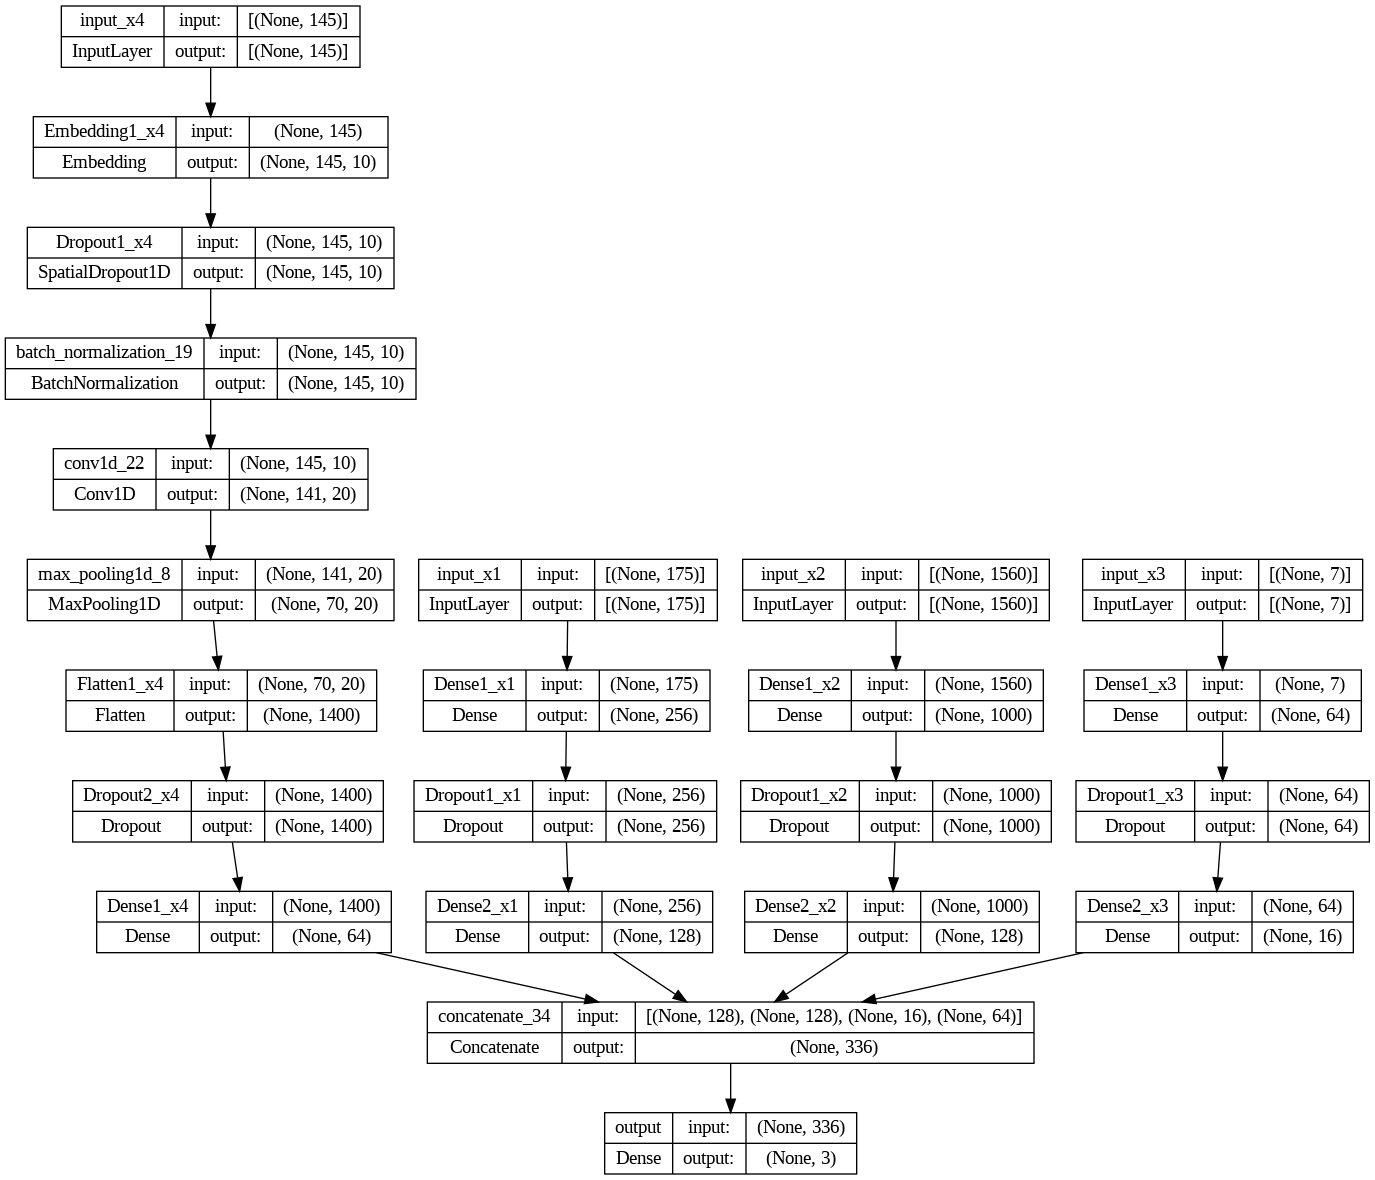

In [ ]:
utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit({'input_x1':x_data1,'input_x2':x_data2,'input_x3':x_data3,'input_x4':x_data4}, y_data, batch_size=48, validation_split=0.2, epochs=30, verbose=1)

Epoch 1/30
27/27 [==============================] - 3s 68ms/step - loss: 0.5443 - accuracy: 0.8352 - val_loss: 0.5022 - val_accuracy: 0.9365
Epoch 2/30
27/27 [==============================] - 1s 40ms/step - loss: 0.3332 - accuracy: 0.9068 - val_loss: 0.4072 - val_accuracy: 0.9365
Epoch 3/30
27/27 [==============================] - 2s 60ms/step - loss: 0.2867 - accuracy: 0.9068 - val_loss: 0.3290 - val_accuracy: 0.9397
Epoch 4/30
27/27 [==============================] - 2s 58ms/step - loss: 0.2538 - accuracy: 0.9084 - val_loss: 0.2772 - val_accuracy: 0.9460
Epoch 5/30
27/27 [==============================] - 1s 46ms/step - loss: 0.2251 - accuracy: 0.9132 - val_loss: 0.2873 - val_accuracy: 0.9397
Epoch 6/30
27/27 [==============================] - 1s 34ms/step - loss: 0.2114 - accuracy: 0.9228 - val_loss: 0.2574 - val_accuracy: 0.9429
Epoch 7/30
27/27 [==============================] - 1s 33ms/step - loss: 0.1958 - accuracy: 0.9299 - val_loss: 0.2424 - val_accuracy: 0.9397
Epoch 8/30
27

In [ ]:
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#history2 = model.fit({'input_x1':x_data1,'input_x2':x_data2,'input_x3':x_data3,'input_x4':x_data4}, y_data, batch_size=32, validation_split=0.15, epochs=20, verbose=1)

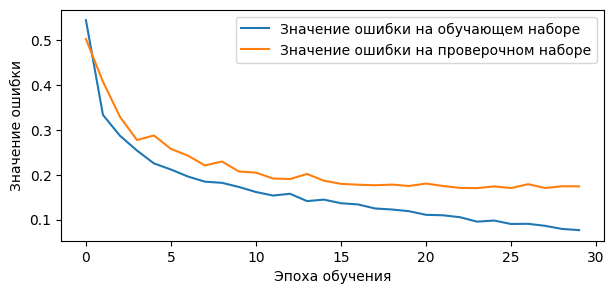

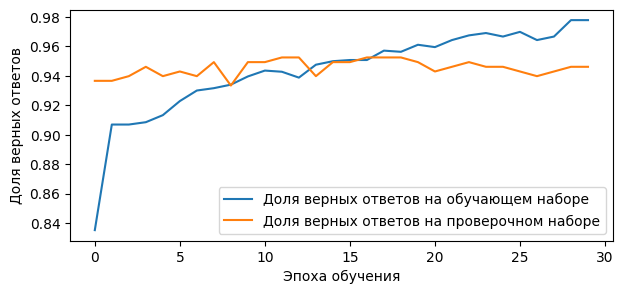

In [ ]:
plt.figure(figsize = (7, 3))
plt.plot(history1.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history1.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()
plt.show()

# Строим график для отображения динамики обучения и точности предсказания сети
plt.figure(figsize = (7, 3))
plt.plot(history1.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history1.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()